In [115]:
import pandas as pd
import numpy as np

In [44]:
Data=pd.read_csv("/home/dharma/Tweeter Mining/output_got.csv")

In [45]:
Data.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,BhattNaturally1,2017-02-13 05:27,0,0,Farmers hit hard as tur dal traders shut shop ...,NaN,@narendramodi @PMOIndia,#demonetisation,8.30928733749994E+017,https://twitter.com/BhattNaturally1/status/830...,NaN,NaN,NaN
1,Shyam17,2017-02-13 05:19,0,0,Note ban most disruptive policy innovation sin...,NaN,NaN,#DeMonetisation #NoteBan #Modi #BJP #RBI #DeMo...,8.30926854638928E+017,https://twitter.com/Shyam17/status/83092685463...,NaN,NaN,NaN
2,Shyam17,2017-02-13 05:16,0,0,"After Demonetisation , Digital Deluge, Banks s...",NaN,NaN,#DeMonetisation #Digital #Digitisation #NoteBan,8.30926046367191E+017,https://twitter.com/Shyam17/status/83092604636...,NaN,NaN,NaN
3,NewsBossIndia,2017-02-13 05:14,0,0,RBI To Declare 'Verified' Figure On Post- Demo...,NaN,NaN,NaN,8.30925659123757E+017,https://twitter.com/NewsBossIndia/status/83092...,NaN,NaN,NaN
4,BhattNaturally1,2017-02-13 05:14,0,0,‘We’ll show them what it means to be cashless’...,NaN,@narendramodi,NaN,8.309255743947E+017,https://twitter.com/BhattNaturally1/status/830...,NaN,NaN,NaN


In [46]:
Temp=[Data["date"],Data["text"]]
Tweets_WithDate=pd.DataFrame(data=Temp).T
?pd.DataFrame

In [47]:
Tweets_WithDate.head()
#Temp

,date,text
0,2017-02-13 05:27,Farmers hit hard as tur dal traders shut shop ...
1,2017-02-13 05:19,Note ban most disruptive policy innovation sin...
2,2017-02-13 05:16,"After Demonetisation , Digital Deluge, Banks s..."
3,2017-02-13 05:14,RBI To Declare 'Verified' Figure On Post- Demo...
4,2017-02-13 05:14,‘We’ll show them what it means to be cashless’...


In [48]:
Tweets_WithDate["text"]=Tweets_WithDate["text"].str.lower()

In [118]:
Tweets_WithDate.head()

10167

In [111]:
Tweets_WithDate.groupby('date').0

In [50]:
The_Measure = ["demonitise", "demonitize", "remonetisation", "remonitization", "remonitise", "remonitize", "banknote", "banknotes", "bank note", "bank notes", "denomination", "high denomination", "500", "1000", "2000", "Mahatma Gandhi Series", "Gandhi series", "ordinance", "fine", "penalty", "cashless", "less cash", "cash free", "cashless transaction", "no cash", "no-cash", "cash", "ATM", "ATM withdrawal", "ATM withdrawal limit", "withdrawal limits", "limit", "air travel", "airports", "NRIs", "foreigners", "foreign tourists", "tourists", "discretion", "savings account", "current account", "wedding", "indelible ink", "ink", "PAN card"]
Gov_Ann = ["Goverenment of India", "GOI", "Prime Minister’s Office", "PMO", "Prime Minister", "PM", "Narendra Modi", "Modi", "Reserve Bank of India", "RBI", "Mint Street", "Dr. Urjit Patel", "Urjit Patel", "Urjit", "Dr. Raghuram Rajan", "Raguram Rajan", "Rajan", "R3", "Parliament", "Parliamentary", "Parliamentary Committee", "Standing Committee on Finance", "Standing Committee", "Finance Ministry", "Ministry of Finance", "Finance Minister", "FM", "Arun Jaitley", "Jaitley", "Ministry of Commerce and Industry", "Ministry of Commerce", "Commerce Ministry", "Commerce Minister", "Nirmala Sitharaman", "Nirmala", "Niti Aayog", "Planning Commission", "Arvind Panagariya", "Bibek Debroy", "Chief Economic Adviser", "Economic Adviser", "Economic Advisor", "Arvind Subramanian", "Piyush Goyal", "All India Radio", "AIR", "Doordarshan", "Prasar Bharti", "Ministry of Information and Broadcasting", "Mann ki Baat", "Central Board of Direct Taxes", "CBDT", "Enforcement Directorate", "ED", "CBI", "FEMA"]
Reason1_FakeC = ["surgical strike", "illegal activity", "action taken", "security issues", "security", "Pakistan", "Pakistani", "Islamabad", "Bangladesh", "terrorism", "Islamic terrorism", " religious terrorism", "terror", "terror trail", "terror finance", "Islamic fundamentalism", "Muslim fundamentalism", "religious fundamentalism", "border", "pilferage", "security features", "counterfeit", "fake", "illicit", "counterfeit money", "counter"]
Reason2_BlackM = ["black money", "black economy", "black wealth", "kaladhan", "shadow economy", "parallel economy", "informal economy", "concealing", "benami", "hoarding", " Income Declaration Scheme", "raids", "seizures", "seized", "undisclosed income", "money laundering"]
Reason3_CashL = ["Cashless", "cash less", "less cash", "payment systems", "retail payments", "POS", "cards", "Pay TM", "mobile payment", "United Payment Interface", "UPI", "swipe machines", "e-payment", "internet banking", "cardless", "gateway"]
Pol_Parties = ["Bhartiya Janata Party", "BJP", "Narendra Modi", "Indian National Congress", "congress", "INC", "BJP Spokesperson", "Congress Spokesperson", "Rahul Gandhi", "Manmohan Singh", "MMS", "Sashi Tharoor", "Randeep Surjewala", "Chidambaram", "Aam Aadmi Party", "AAP", "Arvind Kejriwal", "Kejriwal", "Mamata Banerjee", "Mamata", "Derek", "Nitish Kumar", "Nitish", "Mulayam", "Akhilesh", "Nitish", "Lalu Yadav", "Lalu", "Sitaram Yechuri", "Vijayan", "Election Commission", "Election Commissioner", "High Court", "Supreme Court", "Courts", "public interest litigation", "PIL"]
Media_Reactions = ["Indian Express", "Financial Express", "Times of India", "ToI", "Economic Times", "ET", "Zee", "New Delhi Television", "NDTV", "Anandabazar", "ABP", "India Today", "The Hindu", "Hindustan Times", "HT", "Mint", "Sun", "rediff.com", "Firstpost", "Sun", "UTV", "CNBC", "Times Now", "Dainik Jagran", "Divya Bhaskar", "The Wire", "Economist", "Fianancial Times", "New York Times", "Forbes", "Wall Street", "BBC", "CNN", "Bloomberg", "CMIE", "IndiaSpend", "Indicus", "Rediff", "Newslaundry", "Quint", "Quora", "The Guardian"]
Support = ["NAMO", "Modiji", "President", "Pranab Mukherjee", "Kailash Satyarthi", "crackdown", "long term", "banks", "bankers", "bank chairman", "Arundhuti", "Chanda Kochher", "Anand Mahindra", "Jindal", "Kunal Bahl", "mobile payment", "Pay TM", "Vijay Shankar", "Narayan Murthy", "Baba Ramdev", "Ramdev", "Sri Sri Ravi Shankar", "Sri Sri", "Cjhandrababu Naidu", "Pay TM", "GST", "Quraishi", "IMF", "Global Times", "Jyrki Katainen", "Justin Rowlatt", "Venezuala", "The Independent", "Lee Kuan", "Amitabh Baccchan", "Amitabh", "Aishwarya Rai", "J&K", "stone pelting", "hawala", "trafficking", "Naxalites", "Maoists", "E-commerce", "ecommerce", "raids", "seizures", "tax collection"]
Criticism = ["Bhakt", "shortage", "long queues", "lengthy queue", "lengthy queues", "disruption", "slowdown", "muddled", "muzzled", "poorly planned", "poor planning", "poorly executed", "poor execution", "protest", "protests", "litigation", "strikes", "bandh", "dharna", "rally", "Akrosh Diwas", "crash", "crashed", "closed", "short term", "severe", "detrimental", "death", "deaths", "inconvenience", "rush", "growth", "GDP growth", "plunder", "loot", "bullion", "gold", "jewellery", "real estate", "86", "blood", "circulation", "six months", "leak", "leakage", "scam", "SBI", "Sanjeev Kamboj", "Akila", "Cabinet meeting", "signature", "tourism", "carpet bomgin", "Amartya Sen", "Kaushik Basu", "Subramaniam Swamy", "Arun Shourie", "Pronab Sen", "Prabhat Patnaik", "Ninan", "Deepak Parekh", "Steve Forbes", "Krugman", "Harvard Business Review", "Hitler", "shutdown", "loss", "manpower", "emergency", "Indira", "vegetables", "rot", "dump", "farmers", "farming", "small industries", "SME", "difficulties", "violence", "thrashing", "transportation", "truck", "toll", "rabi", "harvest", "unsold", "drop", "backdated entries"]

In [51]:
def lowerList(List):
    lower = []
    for i in List:
        i = i.lower()
        lower.append(i)
    return lower
Classes = [The_Measure, Gov_Ann, Reason1_FakeC, Reason2_BlackM, Reason3_CashL, Pol_Parties, Media_Reactions, Support, Criticism]
Classes = [lowerList(Class) for Class in Classes]


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

26

In [129]:
#count=np.zeros(Tweets_WithDate.shape[0])
count=np.zeros(len(Classes))
for i in range(len(Classes)):
    for j in range(len(Classes[i])):  
        for k in range(len(Tweets_WithDate['text'])):
            if Classes[i][j] in Tweets_WithDate["text"][k]:
                    #count[k]=count[k]+1
                    count[i]=count[i]+1
                    
                 

In [132]:
#if Classes[3][0] in Tweets_WithDate['text'][4]:
print np.zeros(Tweets_WithDate.shape[0])
print Tweets_WithDate['text'][4]
print count
#Words[][]=


[ 0.  0.  0. ...,  0.  0.  0.]
‘we’ll show them what it means to be cashless’: in west up, simmering anger against demonetisation https:// scroll.in/article/828879 /well-show-them-what-it-means-to-be-cashless-in-west-up-a-simmering-anger-against-demonetisation … @narendramodi
[  2824.  10415.    284.    305.   1430.   3699.  17100.    848.   1959.]


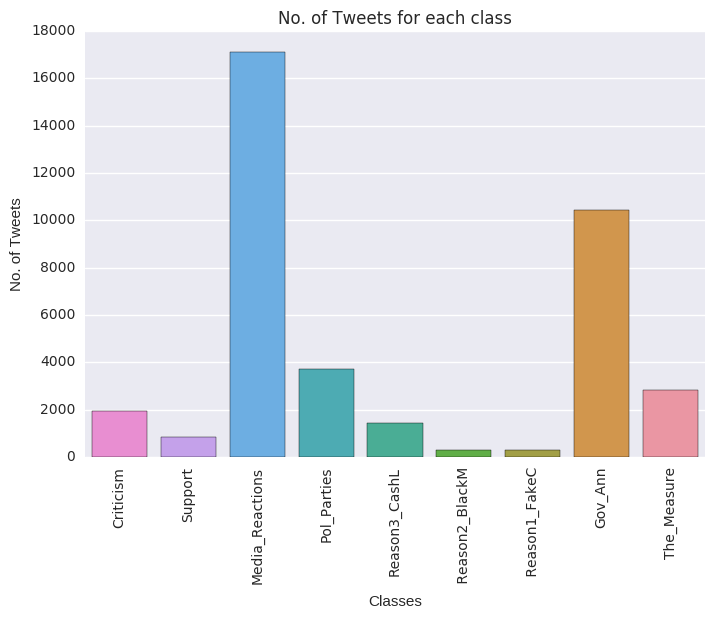

In [142]:
import seaborn as sns
Classes1 = ['The_Measure', 'Gov_Ann',' Reason1_FakeC',' Reason2_BlackM', "Reason3_CashL", 'Pol_Parties', 'Media_Reactions', 'Support', 'Criticism']
_ROTATION_DEGREES = 90
b=sns.barplot(x=Classes1,y=count)
b.set_xticklabels(Classes1, rotation=_ROTATION_DEGREES)
b.set_title('No. of Tweets for each class')
b.set_xlabel("Classes")
b.set_ylabel("No. of Tweets")
b.invert_xaxis()
#plt.yticks(rotation=0) 
#?sns.barplot
#?pd.DataFrame()
#Frequencies_words.plot(kind='bar',)

In [ ]:
Classes1 = ['The_Measure', 'Gov_Ann',' Reason1_FakeC',' Reason2_BlackM', "Reason3_CashL", 'Pol_Parties', 'Media_Reactions', 'Support', 'Criticism']

array([ 8.,  6.,  4., ...,  3.,  7.,  3.])

In [119]:
for i in range(len(Classes)):
    for j in range(len(Classes[i])): 
        print a[i][j]

d


IndexError: string index out of range